#### The notebook is for exploring the dataset participants-07, my group's driveing question is trend in week to week data.

Author：Shangfei Wang

All cells are completed on September 19.

In this project, I will perform cleanup and simple analysis of Participant-07 data.

Import the packages required for programming.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Read files from the resources folder.

In [2]:
df = pd.read_csv("resources/Participant-07.csv")


Display the first five lines of data, check whether the read is successful.

In [3]:
df.head()

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0


View data summaries to help creators and observers understand the basics of their data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          6133 non-null   object 
 1   Finish         6133 non-null   object 
 2   Steps (count)  6133 non-null   float64
dtypes: float64(1), object(2)
memory usage: 143.9+ KB


Split the Start and Finish columns in the data.

In [5]:
df['Date'] = df['Start'].map(lambda x:x.split(' ')[0])
df['Time'] = df['Start'].map(lambda x:x.split(' ')[1])
df


,Start,Finish,Steps (count),Date,Time
0,01-Jan-2022 00:00,01-Jan-2022 01:00,32.0,01-Jan-2022,00:00
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0,01-Jan-2022,01:00
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0,01-Jan-2022,02:00
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0,01-Jan-2022,03:00
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0,01-Jan-2022,04:00
...,...,...,...,...,...
6128,13-Sep-2022 07:00,13-Sep-2022 08:00,798.0,13-Sep-2022,07:00
6129,13-Sep-2022 08:00,13-Sep-2022 09:00,139.0,13-Sep-2022,08:00
6130,13-Sep-2022 09:00,13-Sep-2022 10:00,392.0,13-Sep-2022,09:00
6131,13-Sep-2022 10:00,13-Sep-2022 11:00,328.0,13-Sep-2022,10:00


In [6]:
df = df[['Date', 'Time', 'Finish', 'Steps (count)']]
df

,Date,Time,Finish,Steps (count)
0,01-Jan-2022,00:00,01-Jan-2022 01:00,32.0
1,01-Jan-2022,01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022,02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022,03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022,04:00,01-Jan-2022 05:00,0.0
...,...,...,...,...
6128,13-Sep-2022,07:00,13-Sep-2022 08:00,798.0
6129,13-Sep-2022,08:00,13-Sep-2022 09:00,139.0
6130,13-Sep-2022,09:00,13-Sep-2022 10:00,392.0
6131,13-Sep-2022,10:00,13-Sep-2022 11:00,328.0


The Start and Finish columns in the data contain dates and time points, and we may use separate date integration or time points later. It will be convenient for us to use after splitting.

In order to facilitate analysis, we can extract the date we need by specific characters.

In [7]:
df=df[df['Date'].str.contains("01-Jan-2022")]
df

,Date,Time,Finish,Steps (count)
0,01-Jan-2022,00:00,01-Jan-2022 01:00,32.000000
1,01-Jan-2022,01:00,01-Jan-2022 02:00,0.000000
2,01-Jan-2022,02:00,01-Jan-2022 03:00,0.000000
3,01-Jan-2022,03:00,01-Jan-2022 04:00,0.000000
4,01-Jan-2022,04:00,01-Jan-2022 05:00,0.000000
5,01-Jan-2022,05:00,01-Jan-2022 06:00,0.000000
6,01-Jan-2022,06:00,01-Jan-2022 07:00,0.000000
7,01-Jan-2022,07:00,01-Jan-2022 08:00,0.000000
8,01-Jan-2022,08:00,01-Jan-2022 09:00,0.000000
9,01-Jan-2022,09:00,01-Jan-2022 10:00,526.000000


The above is the data of the respondents on January 1, 2022.

In the step column in the table above, there are too many decimal places to determine significant digits.

In [8]:
df.round(2)

,Date,Time,Finish,Steps (count)
0,01-Jan-2022,00:00,01-Jan-2022 01:00,32.00
1,01-Jan-2022,01:00,01-Jan-2022 02:00,0.00
2,01-Jan-2022,02:00,01-Jan-2022 03:00,0.00
3,01-Jan-2022,03:00,01-Jan-2022 04:00,0.00
4,01-Jan-2022,04:00,01-Jan-2022 05:00,0.00
5,01-Jan-2022,05:00,01-Jan-2022 06:00,0.00
6,01-Jan-2022,06:00,01-Jan-2022 07:00,0.00
7,01-Jan-2022,07:00,01-Jan-2022 08:00,0.00
8,01-Jan-2022,08:00,01-Jan-2022 09:00,0.00
9,01-Jan-2022,09:00,01-Jan-2022 10:00,526.00


This will control the data to two decimal places.

We can determine what time of day is the high frequency of walking for the respondents.

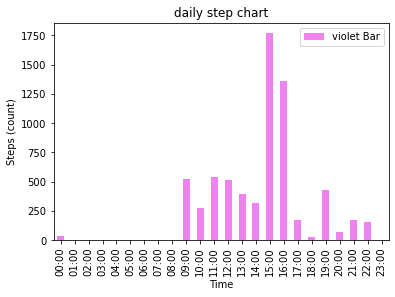

In [9]:
df.plot.bar('Time', 'Steps (count)', label="violet Bar", color='violet')

plt.xlabel("Time")
plt.ylabel("Steps (count)")
plt.title("daily step chart")
plt.legend()

plt.show()

It can be seen from the figure that the number of steps of the respondents before 15:00 to 16:00 increased significantly.